In [1]:
%pylab inline

def area_under_sorted_points(x, y):
    bin_width = diff(x)
    y_avg = (y[:-1] + y[1:])/2
    return (y_avg * bin_width).sum()

from analysis import pareto, corrected_points, folder_names, conditions
print conditions
conditions = ["Control", "Margin", "Gamma Slider", "Perf Slider"]
print zip(conditions, folder_names)

Populating the interactive namespace from numpy and matplotlib
['Control', 'Margin', 'Robust Performance', 'Robust Gamma']
[('Control', './data/control/'), ('Margin', './data/margin/'), ('Gamma Slider', './data/robust_performance/'), ('Perf Slider', './data/robust_gamma/')]


In [3]:
figure(figsize=(12,8))
pointids_all = {}
for condition, folder in zip(conditions, folder_names):
    print folder
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    pps = pareto(pointids)
    pointids_all.update(pointids)
    pps_all.update(pps)
    xy = array(sorted(pps.keys()))
    x = xy[:,0]
    y = xy[:,1]
    for i in range(len(x)):
        min_idx = i
        if x[i] > 1100:
            break
    for i in range(len(x)-1,-1,-1):
        max_idx = i
        if x[i] < 1270:
            break
    print(min_idx, max_idx)
    x = x[min_idx:max_idx]
    y = y[min_idx:max_idx]
    area = area_under_sorted_points(x, y)
    print area
    plot(x, y, label=condition+": %i" % area)
    legend()
    grid(True)
    
condition = "Overall"
pps = pareto(pointids_all)
xy = array(sorted(pps))
x = xy[:,0]
y = xy[:,1]
for i in range(len(x)):
    min_idx = i
    if x[i] > 1100:
        break
for i in range(len(x)-1,-1,-1):
    max_idx = i
    if x[i] < 1270:
        break
print(min_idx, max_idx)
x = x[min_idx:max_idx]
y = y[min_idx:max_idx]
area = area_under_sorted_points(x, y)
print area
plot(x, y, label=condition+": %i" % area)
legend()
grid(True)

./data/control/


NameError: name 'pps_all' is not defined

In [4]:
pointids_all = {}
for condition, folder in zip(conditions, folder_names):
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    pps = pareto(pointids)
    pointids_all.update(pointids)
    
condition = "Overall"
pps = pareto(pointids_all)
fail_perfs = {fail: perf for perf, fail in pps}
for fail in range(70,-1,-1):
    if fail not in fail_perfs:
#         print "failure rate of", fail, "not achieved!"
        fail_perfs[fail] = fail_perfs[fail+1]
        
xy = array(sorted(fail_perfs.items()))
y = xy[:,0]
x = xy[:,1]
# area = 0
# print area
# plot(x, y, label=condition+": %i" % area)
# legend()
# grid(True)

figure(figsize=(12,8))
for condition, folder in zip(conditions, folder_names):    
    print folder
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    pps = pareto(pointids)
    pointids_all.update(pointids)
    pps_all.update(pps)
    xy = array(sorted(pps.keys()))
    y = xy[:,0]
    x = xy[:,1]
    best_y = array([fail_perfs[fail] for fail in x])
    area = 100*(y/best_y - 1).mean()
    print area
    fill_between(x, best_y, y, label=condition+": %.2f" % area, alpha=0.3)
    legend()
    grid(True)

./data/control/


NameError: name 'pps_all' is not defined

Control
  33    0.3%
  11    1.0%
  26    0.4%
  17    1.3%
   7    1.4%
  32    0.4%
  16    1.8%
  23    0.5%
   1    0.2%
  38    0.3%

Margin
  34    0.6%
  10    3.8%
  30    0.3%
  28    0.5%
  22    0.2%
   5    0.3%
   2    0.3%
  42    1.5%
  39    0.5%
  19    0.3%
  15    0.4%

Gamma Slider
   3    0.5%
  12    0.2%
  37    0.3%
  29    0.2%
  18    0.2%
  41    0.1%
  27    0.2%
  13    0.2%
   6    0.2%
  21    0.2%
  36    0.2%

Perf Slider
   4    0.2%
  25    0.1%
  35    0.6%
  24    0.3%
   8    0.5%
  43    0.3%
  31    0.3%
  14    0.1%
  40    0.3%
  20    0.2%
   9    0.1%

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 0.3473095561604126 0.4468376792998445 1.3149138839154473
Margin 0.2989279375242022 0.39299775710548407 0.586900660667484
Gamma Slider 0.18303723746437484 0.20240092296193124 0.21035267798743376
Perf Slider 0.12189458937423334 0.2686550536266196 0.3438601366397423


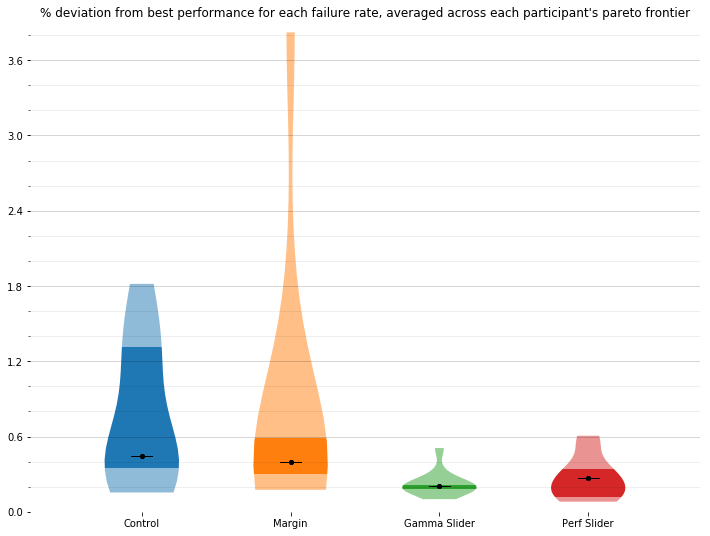

In [5]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print condition
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            total_percent_delta += perf/fail_perfs[fail] - 1
        total_percent_delta /= len(points)
        print "  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (100*total_percent_delta)
        percents[condition].append(100*total_percent_delta)
    print

fig, ax = subplots(figsize=(12,9), facecolor="white")
print [condition for condition in conditions]
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=20, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="lower")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="higher")
    print conditions[i], lo, med, hi
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
title("% deviation from best performance for each failure rate, averaged across each participant's pareto frontier")
ylim([0, 3.9])
ax.yaxis.set_major_locator(MultipleLocator(0.6))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.grid(which="major", axis="y", alpha=0.125, color="black")
ax.grid(which='minor', axis="y", alpha=0.08, color="black")
plt.box(on=None)

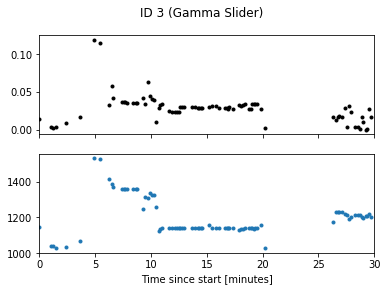

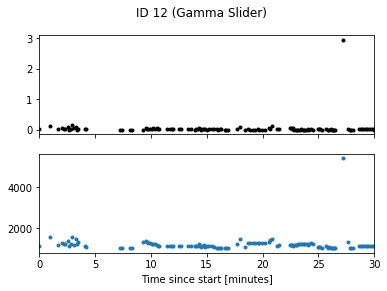

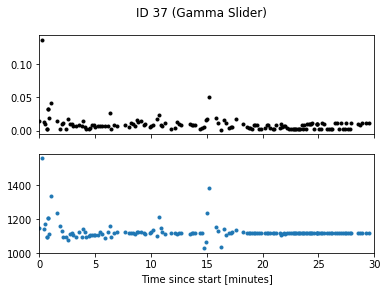

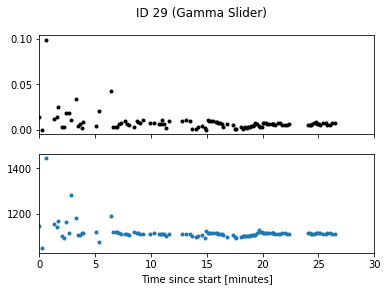

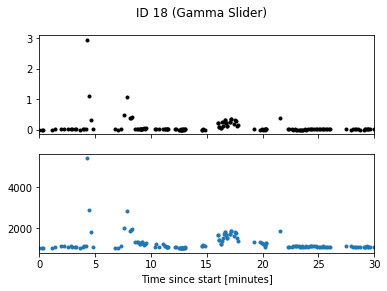

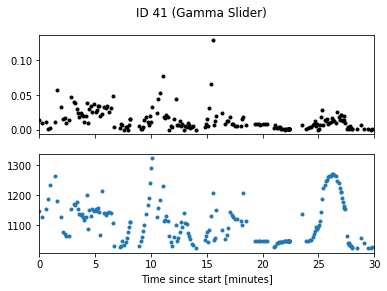

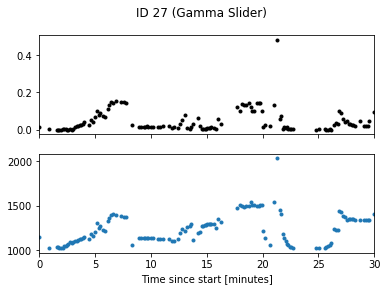

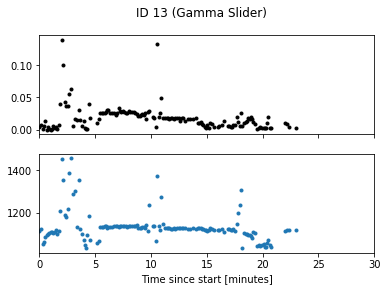

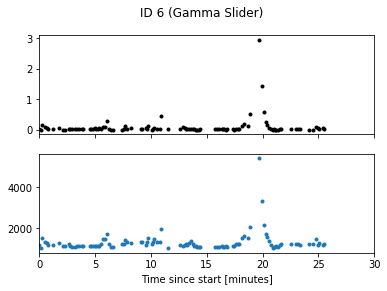

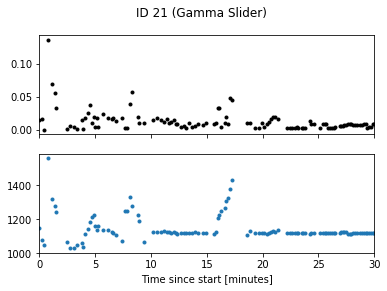

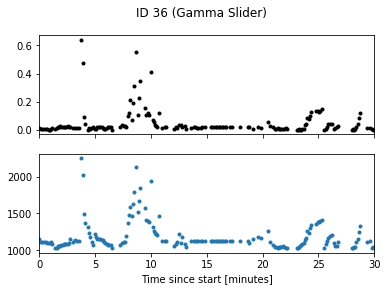

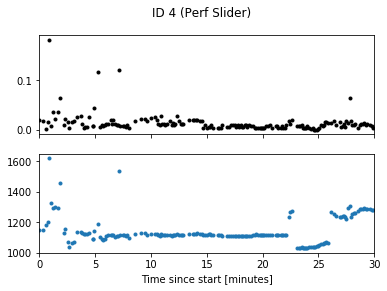

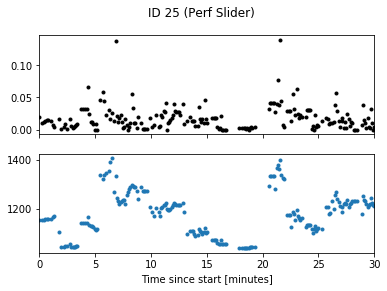

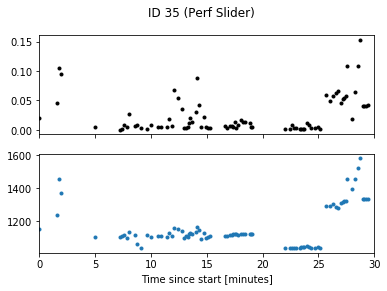

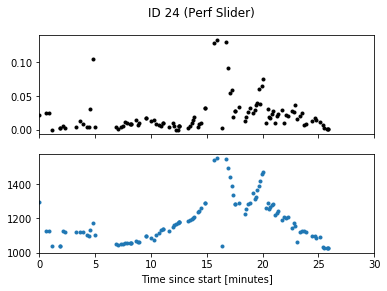

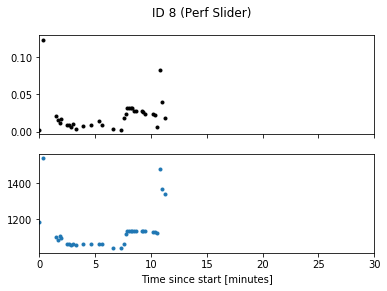

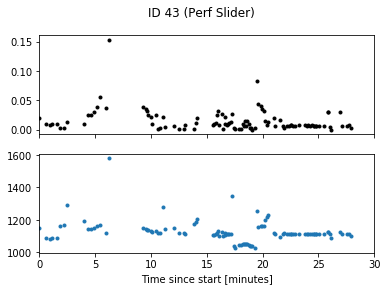

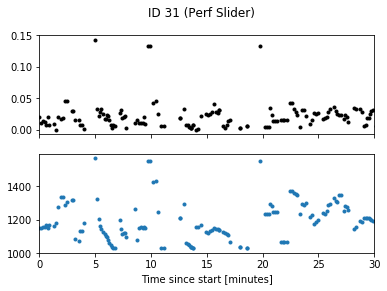

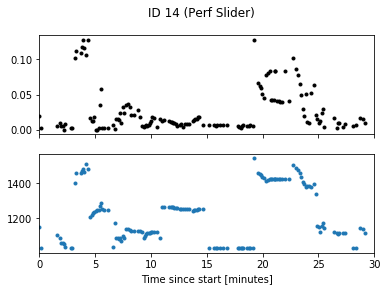

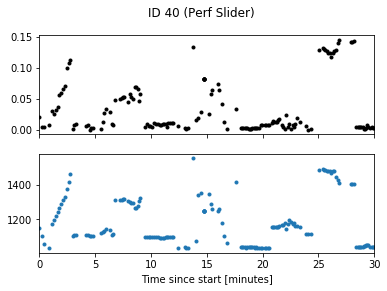

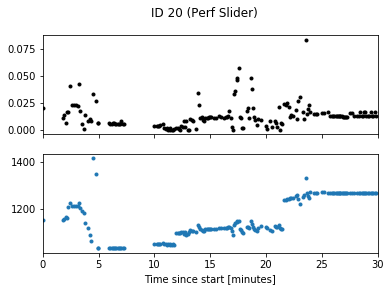

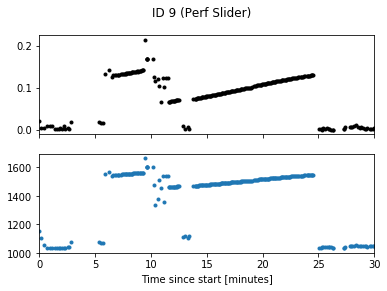

In [34]:
from collections import defaultdict

for condition, folder in zip(conditions, folder_names)[2:]:
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        times = []
        for point in points:
            times.append(int(pointnum[point+(idn,)]))
        metric = [perf/fail_perfs[fail] - 1 for perf, fail in points]
        fig, (ax1, ax2) = subplots(2, 1, sharex=True, figsize=(6,4), facecolor="white")
        times = array(times) - times[0]
        ax1.plot(times/60., metric, "k.")
#         ax1.set_ylim([0, 0.5])
        ax2.plot(times/60., [perf for perf, _ in points], ".")
        ax2.set_xlabel("Time since start [minutes]")
        ax2.set_xlim([0, 30])
        fig.suptitle(" ".join(idn.split()[1:])[1:-1] + " (%s)" % condition)
#         break